In [ ]:
##Fraud Detection Project by Indika Debnath

# Fraud Detection on Bank Payments

## Fraud and detecting it

Fraudulent behavior can be seen across many different fields such as e-commerce, healthcare, payment and banking systems. Fraud is a billion-dollar business and it is increasing every year. The PwC global economic crime survey of 2018 [1] found that half (49 percent) of the 7,200 companies they surveyed had experienced fraud of some kind.

Even if fraud seems to be scary for businesses it can be detected using intelligent systems such as rules engines or machine learning. Most people here in Kaggle are familier with machine learning but for rule engines here is a quick information. 
    A rules engine is a software system that executes one or more business rules in a runtime production environment. These rules are generally written by domain experts for transferring the knowledge of the problem to the rules engine and from there to production. Two rules examples for fraud detection would be limiting the number of transactions in a time period (velocity rules),  denying the transactions which come from previously known fraudulent IP's and/or domains.
    
Rules are great for detecting some type of frauds but they can fire a lot of false positives or false negatives in some cases because they have predefined threshold values. For example let's think of a rule for denying a transaction which has an amount that is bigger than 10000 dollars for a specific user. If this user is an experienced fraudster, he/she may be aware of the fact that the system would have a threshold and he/she can just make a transaction just below the threshold value (9999 dollars).

For these type of problems ML comes for help and reduce the risk of frauds and the risk of business to lose money. With the combination of rules and machine learning, detection of the fraud would be more precise and confident.

## Banksim dataset

We detect the fraudulent transactions from the Banksim dataset. This synthetically generated dataset consists of payments from various customers made in different time periods and with different amounts. For
more information on the dataset you can check the [Kaggle page](https://www.kaggle.com/ntnu-testimon/banksim1) for this dataset which also has the link to the original paper. 

Here what we'll do in this kernel:
1. [Exploratory Data Analysis (EDA)]
2. [Data Preprocessing]
3. [Oversampling with SMOTE]
4. [Logistic Regression]
5. [Random Forest Classifier]
6. [XGBoost Classifier]

In [ ]:
import numpy as np # Mathematical Calculations
import pandas as pd # Data operations and summaries
import seaborn as sns # Good data visualizations
import matplotlib.pyplot as plt # basic Visualizations
import statsmodels.api as sm # Statistical Models
import warnings
warnings.simplefilter(action='ignore')
from scipy import stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Indika_Project_Data/Fraud Data/bs140513_032310.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Preliminary Checks***

In [ ]:
len(df) # Number of Rows in the data

594643

In [ ]:
df.shape # Number of rows and columns

(594643, 10)

In [ ]:
df.head(10)# Extract the top n observations from the data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [ ]:
df.tail(10) # Extracts the last n observations

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594633,179,'C1039390058','4','M','28007','M45060432','28007','es_hotelservices',190.31,0
594634,179,'C728039227','6','M','28007','M348934600','28007','es_transportation',27.93,0
594635,179,'C728039227','6','M','28007','M1823072687','28007','es_transportation',30.04,0
594636,179,'C1904086644','5','F','28007','M1823072687','28007','es_transportation',28.93,0
594637,179,'C748358246','2','M','28007','M1823072687','28007','es_transportation',51.17,0
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


In [ ]:
df.columns # Display the names of the columns
# Advisable to change the names of the columns especially when there is no clarity in the names or when there are spaces in the names

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [ ]:
df.info()# Gives information on Missing values, Data Types
# Checking whether any of the columns differ in their data type from what is typically expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
df.describe()# Descriptive Statistics of the columns (Numerical columns)


,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


# ***Data Cleaning***

In [ ]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

# ***There is no  missing values which means we don't have to perform any imputation.*** 


In [ ]:
df.nunique() # Unique number of values in each column

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

# ***Removing Unnecessary Columns***

In [ ]:
#we can drop Customer column as this column has no effect whether a transaction is fraud or not, 
#and we can drop 'zipcodeOri', 'zipMerchant' these 2 columns also they have no significance whether a transaction is fraud or not & providing
# only 1 value
# df.drop(["Cholesterol"],axis=1, inplace = True)
df_drop=df.drop(['customer','zipcodeOri','merchant','zipMerchant'], axis = 1)

In [ ]:
df_drop.head(5)

,step,age,gender,category,amount,fraud
0,0,'4','M','es_transportation',4.55,0
1,0,'2','M','es_transportation',39.68,0
2,0,'4','F','es_transportation',26.89,0
3,0,'3','M','es_transportation',17.25,0
4,0,'5','M','es_transportation',35.72,0


In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   age       594643 non-null  object 
 2   gender    594643 non-null  object 
 3   category  594643 non-null  object 
 4   amount    594643 non-null  float64
 5   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 27.2+ MB


In [ ]:
# Count the number of missing values ine ach column
df_drop.isnull().sum().sort_values(ascending=False)

step        0
age         0
gender      0
category    0
amount      0
fraud       0
dtype: int64

# ***Outlier_Detection***

In [ ]:
# Have a list of categorical and numerical columns

#cat_columns = df_drop.select_dtypes(include='object').columns
num_columns = df_drop.select_dtypes(exclude='object').columns

In [ ]:
def Zscore_outlier(df_drop):
    out=[]
    m = np.mean(df_drop)
    sd = np.std(df_drop)
    for i in df_drop: 
        z = (i-m)/sd
        if np.abs(z) > 5: 
            out.append(i)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))
    
for var in num_columns: 
    print(var)
    print(Zscore_outlier(df_drop[var]))

step
Outliers: []
Number of Outliers: 0
None
amount
Outliers: [667.09, 764.0, 707.22, 881.04, 1993.68, 908.5, 933.69, 1041.31, 905.54, 1126.96, 3387.85, 6888.3, 809.46, 896.93, 661.53, 801.49, 836.04, 646.92, 788.67, 1167.18, 663.53, 1022.06, 891.0, 1304.93, 1079.27, 653.5, 7432.48, 644.59, 1267.99, 800.58, 848.4, 1256.35, 709.28, 643.71, 4883.62, 701.22, 716.17, 699.94, 3334.89, 5107.7, 1025.56, 833.47, 3999.35, 2973.46, 664.94, 701.64, 987.86, 702.72, 1083.7, 2144.86, 697.85, 607.76, 851.71, 3682.79, 2832.02, 613.67, 644.15, 661.19, 5326.55, 1295.3, 3611.11, 2503.3, 776.51, 817.59, 614.25, 627.98, 5070.57, 4762.5, 749.53, 6142.59, 2981.86, 925.66, 628.61, 595.15, 784.69, 969.68, 830.57, 4046.65, 3065.22, 672.44, 3020.3, 3922.14, 3194.56, 845.44, 2854.69, 4217.86, 901.32, 656.54, 689.86, 626.03, 964.96, 648.71, 766.11, 642.15, 620.64, 3799.04, 2917.32, 634.76, 780.28, 1022.83, 597.17, 867.29, 729.03, 769.16, 604.59, 668.62, 694.15, 703.95, 606.91, 2846.67, 2077.72, 663.05, 736.28, 615

There are outliers in Fraud and Amount columns ,oultiers are not error, they are extreme values , if we remove them directly we cann loose out informations when there is large data.we can handle outlier by models like Random forest
Outlier help to analyse whether we require the data transformations.

# ***Data Preprocessing***

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,QuantileTransformer
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Have a list of categorical and numerical columns

categorical_columns = df_drop.select_dtypes(include='object').columns
numerical_columns = df_drop.select_dtypes(exclude='object').columns

In [ ]:
categorical_columns

Index(['age', 'gender', 'category'], dtype='object')

In [ ]:
numerical_columns

Index(['step', 'amount', 'fraud'], dtype='object')



Imputattion,category ordinal data conversion

why we need standardization?

1.Consider the above data frame, here we have 2 numerical values: Age and Weight. They are not on the same scale as Age is in years and Weight is in Kg and since Weight is more likely to greater than Age; therefore, our model will give more weightage to Weight, which is not the ideal scenario as Age is also an integral factor here. In order to avoid this issue, we perform Standardization.

2.The important thing to note here is that we need to standardize both training and testing data.

fit_transform is equivalent to using fit and then transform.
fit function calculates the mean and standard deviation and the transform function actually standardizes the dataset and we can do this process in a single line of code using the fit_transform function.

3.Another important thing to note here is that we will use only the transform method when dealing with the test data







In [ ]:
# Encoding Categorical Variables on the entire Feature data
#As our all the  categorical variables are nominal we can use pd get dummies to encode categorical variable

X = pd.get_dummies(data = df_drop, prefix =categorical_columns , prefix_sep='_',
               columns = categorical_columns,
               drop_first =False,
              dtype='int8')
X

,step,amount,fraud,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,4.55,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,39.68,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,26.89,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,17.25,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,35.72,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
594639,179,50.73,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
594640,179,22.44,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594641,179,14.46,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.columns

Index(['step', 'amount', 'fraud', 'age_'0'', 'age_'1'', 'age_'2'', 'age_'3'',
       'age_'4'', 'age_'5'', 'age_'6'', 'age_'U'', 'gender_'E'', 'gender_'F'',
       'gender_'M'', 'gender_'U'', 'category_'es_barsandrestaurants'',
       'category_'es_contents'', 'category_'es_fashion'', 'category_'es_food'',
       'category_'es_health'', 'category_'es_home'',
       'category_'es_hotelservices'', 'category_'es_hyper'',
       'category_'es_leisure'', 'category_'es_otherservices'',
       'category_'es_sportsandtoys'', 'category_'es_tech'',
       'category_'es_transportation'', 'category_'es_travel'',
       'category_'es_wellnessandbeauty''],
      dtype='object')

In [ ]:
#X (it is one hot encoded from df_drop dataframe)is dervied from df_drop, X become Feature Variable
X = X.drop(["fraud"],axis = 1)#creating different data frame where fraud column is not present
X

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,4.55,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,39.68,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,26.89,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,17.25,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,35.72,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
594639,179,50.73,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
594640,179,22.44,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594641,179,14.46,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#y is target variable
y = df_drop['fraud'] #creating different data frame for fraud
y

#y = data['fraud']

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594643, dtype: int64

Data is said to be imbalanced when instances of one class outnumber the other(s) by a large proportion.Feeding imbalanced data to your classifier can make it biased in favor of the majority class, simply because it did not have enough data to learn about the minority.


# ***Oversampling with SMOTE***

Using SMOTE(Synthetic Minority Oversampling Technique) [2] for balancing the dataset. Resulted counts show that now we have exact number of class instances (1 and 0).

In [ ]:
df_drop['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

# Separate the features variables from the Target Variables

X, y = sm.fit_resample(X, y)

In [ ]:
# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Capture the columns of training data

col_names = X_train.columns
col_names

Index(['step', 'amount', 'age_'0'', 'age_'1'', 'age_'2'', 'age_'3'', 'age_'4'',
       'age_'5'', 'age_'6'', 'age_'U'', 'gender_'E'', 'gender_'F'',
       'gender_'M'', 'gender_'U'', 'category_'es_barsandrestaurants'',
       'category_'es_contents'', 'category_'es_fashion'', 'category_'es_food'',
       'category_'es_health'', 'category_'es_home'',
       'category_'es_hotelservices'', 'category_'es_hyper'',
       'category_'es_leisure'', 'category_'es_otherservices'',
       'category_'es_sportsandtoys'', 'category_'es_tech'',
       'category_'es_transportation'', 'category_'es_travel'',
       'category_'es_wellnessandbeauty''],
      dtype='object')

In [ ]:
X_test

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
725578,145,152.219392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413195,130,30.560000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
659412,48,1006.181320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
555050,169,18.480000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1031734,147,431.900154,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412629,130,23.940000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
257563,86,41.350000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
181183,62,12.790000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527306,161,0.370000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# ***Feature Selection***

### *Constant Features Removal (Zero Variance Removal)*

In [ ]:
# Filter out any variables with a single constant value
#VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. 
#By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
constant_filter.get_support().sum()

29

In [ ]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
col_names = col_names[constant_filter.get_support()]

In [ ]:
col_names

Index(['step', 'amount', 'age_'0'', 'age_'1'', 'age_'2'', 'age_'3'', 'age_'4'',
       'age_'5'', 'age_'6'', 'age_'U'', 'gender_'E'', 'gender_'F'',
       'gender_'M'', 'gender_'U'', 'category_'es_barsandrestaurants'',
       'category_'es_contents'', 'category_'es_fashion'', 'category_'es_food'',
       'category_'es_health'', 'category_'es_home'',
       'category_'es_hotelservices'', 'category_'es_hyper'',
       'category_'es_leisure'', 'category_'es_otherservices'',
       'category_'es_sportsandtoys'', 'category_'es_tech'',
       'category_'es_transportation'', 'category_'es_travel'',
       'category_'es_wellnessandbeauty''],
      dtype='object')

In [ ]:
X_train = pd.DataFrame(constant_filter.fit_transform(X_train),columns = col_names)
X_test = pd.DataFrame(constant_filter.transform(X_test),columns = col_names)

In [ ]:
X_train

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,70.0,366.731028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,363.125719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,6.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,177.417978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112.0,35.300000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822415,115.0,46.450000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
822416,53.0,55.310000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
822417,149.0,192.720974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
822418,42.0,8.940000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# *Quasi Constant Removal (Near Zero Variance)*

In [ ]:
quasi_constant_filter = VarianceThreshold(threshold=0.001)
quasi_constant_filter.fit(X_train)

VarianceThreshold(threshold=0.001)

In [ ]:


quasi_constant_filter.get_support().sum()
col_names = col_names[quasi_constant_filter.get_support()]

In [ ]:
X_train = pd.DataFrame(quasi_constant_filter.fit_transform(X_train),columns = col_names)
X_test = pd.DataFrame(quasi_constant_filter.transform(X_test), columns = col_names)

In [ ]:
X_train.head()

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,70.0,366.731028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,363.125719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,6.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,177.417978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112.0,35.300000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# *Coorelated Features Selection*

The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here### Correlated Feature Removal

We need to set an absolute value, say 0.5 as the threshold for selecting the variables. If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as multicollinearity.

In [ ]:
# Take paiwise correlation

corrmat = X_train.corr()

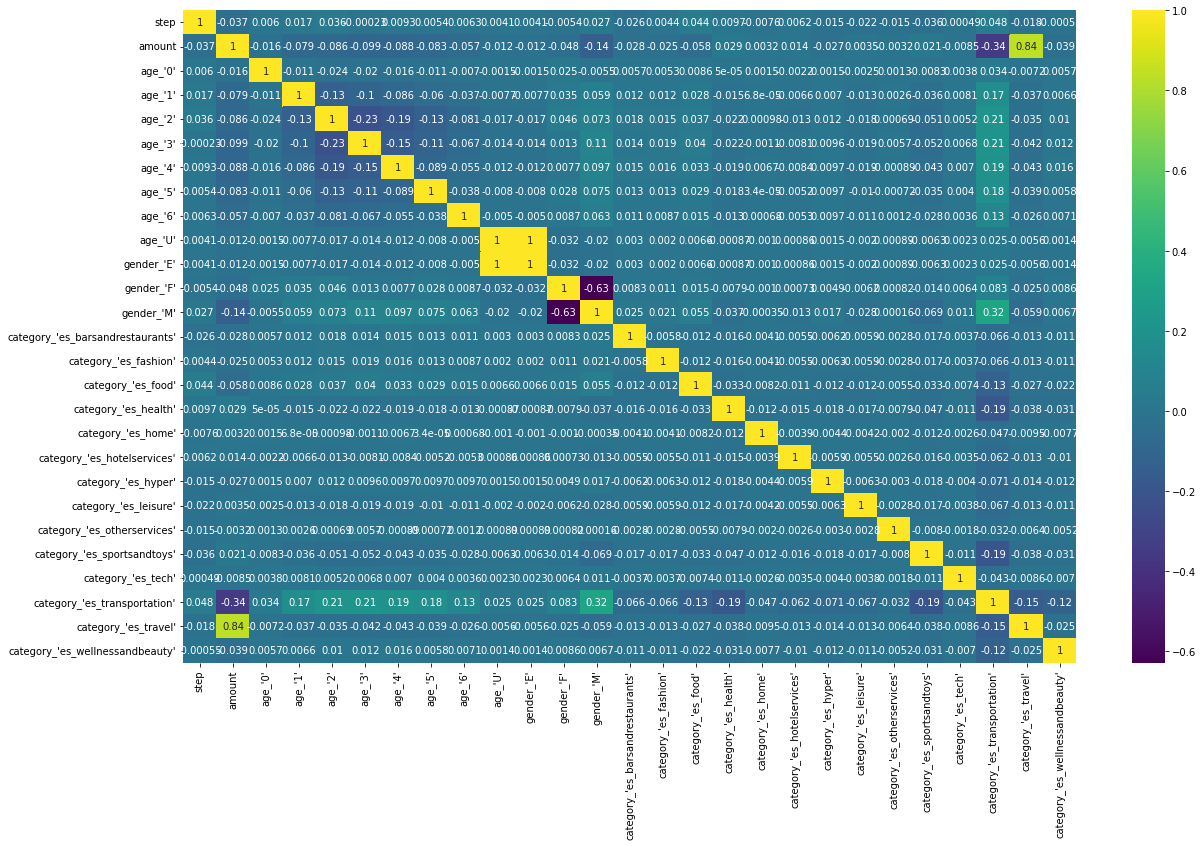

In [ ]:
# Heat Map of the correlation

plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot = True, cmap = 'viridis')

In [ ]:
# Function to capture pair wise correlations greater than a set threshold

def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features_1 = get_correlation(X_train, 1)
corr_features_1

set()

In [ ]:
col_names

Index(['step', 'amount', 'age_'0'', 'age_'1'', 'age_'2'', 'age_'3'', 'age_'4'',
       'age_'5'', 'age_'6'', 'age_'U'', 'gender_'E'', 'gender_'F'',
       'gender_'M'', 'category_'es_barsandrestaurants'',
       'category_'es_fashion'', 'category_'es_food'', 'category_'es_health'',
       'category_'es_home'', 'category_'es_hotelservices'',
       'category_'es_hyper'', 'category_'es_leisure'',
       'category_'es_otherservices'', 'category_'es_sportsandtoys'',
       'category_'es_tech'', 'category_'es_transportation'',
       'category_'es_travel'', 'category_'es_wellnessandbeauty''],
      dtype='object')

In [ ]:
# Simple outright dropping of the correlated columns
X_train = X_train.drop(labels=corr_features_1, axis = 1)
X_test = X_test.drop(labels = corr_features_1, axis = 1)

In [ ]:
col_names = col_names.drop(corr_features_1)

In [ ]:
X_train.columns = col_names
X_test.columns = col_names

In [ ]:
X_train.head()

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,70.0,366.731028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,363.125719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,6.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,177.417978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112.0,35.300000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# *Feature Importance*

# *Feature selection based on mutual information*




Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Mutual Information measures the entropy drops under the condition of the target value. I found the cleanest explanation to this concept is this formula:
MI(feature;target) = Entropy(feature) - Entropy(feature|target)
The MI score will fall in the range from 0 to 1. The higher value, the closer connection between this feature and the target, suggests that we should put this feature in the training dataset. If the MI score is 0 or very low like 0.01. the low score suggests a weak connection between this feature and the target.

In [ ]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
mi = mutual_info_classif(X_train, y_train.astype(int))

In [ ]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)

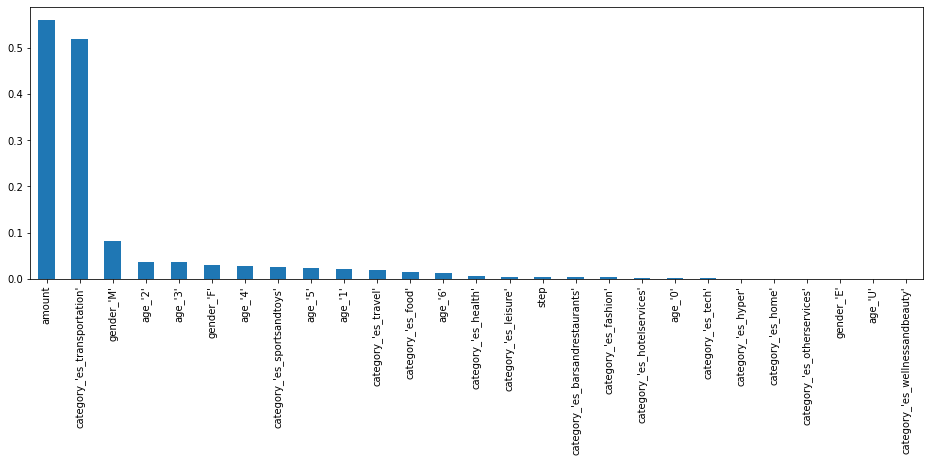

In [ ]:
mi.plot.bar(figsize = (16,5))

In [ ]:
mi

amount                              0.560855
category_'es_transportation'        0.518590
gender_'M'                          0.081716
age_'2'                             0.035795
age_'3'                             0.035228
gender_'F'                          0.029378
age_'4'                             0.028315
category_'es_sportsandtoys'         0.025421
age_'5'                             0.023830
age_'1'                             0.020323
category_'es_travel'                0.019681
category_'es_food'                  0.015407
age_'6'                             0.013144
category_'es_health'                0.005521
category_'es_leisure'               0.004465
step                                0.004229
category_'es_barsandrestaurants'    0.003203
category_'es_fashion'               0.003061
category_'es_hotelservices'         0.001024
age_'0'                             0.000991
category_'es_tech'                  0.000661
category_'es_hyper'                 0.000186
category_'

In [ ]:
sel = SelectPercentile(mutual_info_classif, percentile=88).fit(X_train, y_train.astype(int))


In [ ]:
X_train.columns[sel.get_support()]

Index(['step', 'amount', 'age_'0'', 'age_'1'', 'age_'2'', 'age_'3'', 'age_'4'',
       'age_'5'', 'age_'6'', 'age_'U'', 'gender_'F'', 'gender_'M'',
       'category_'es_barsandrestaurants'', 'category_'es_fashion'',
       'category_'es_food'', 'category_'es_health'', 'category_'es_home'',
       'category_'es_hotelservices'', 'category_'es_leisure'',
       'category_'es_sportsandtoys'', 'category_'es_transportation'',
       'category_'es_travel''],
      dtype='object')

In [ ]:
col_names = col_names[sel.get_support()]

In [ ]:
col_names

Index(['step', 'amount', 'age_'0'', 'age_'1'', 'age_'2'', 'age_'3'', 'age_'4'',
       'age_'5'', 'age_'6'', 'age_'U'', 'gender_'F'', 'gender_'M'',
       'category_'es_barsandrestaurants'', 'category_'es_fashion'',
       'category_'es_food'', 'category_'es_health'', 'category_'es_hyper'',
       'category_'es_leisure'', 'category_'es_sportsandtoys'',
       'category_'es_tech'', 'category_'es_transportation'',
       'category_'es_travel'', 'category_'es_wellnessandbeauty''],
      dtype='object')

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True])

In [ ]:
len(X_train.columns[sel.get_support()])

23

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train,columns = col_names)
X_test = pd.DataFrame(X_test,columns = col_names)
X_train.head()

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_fashion',category_'es_food',category_'es_health',category_'es_hyper',category_'es_leisure',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,70.0,366.731028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,363.125719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,6.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,177.417978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112.0,35.300000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# ***Feature Transformation***

*  **Why we need Feature transformation?**
*   This dataset is also interesting because it has huge outliers. While there are times when it’s best to remove outliers, there may be times where outliers actually contain valuable information. So I left these outliers in to see how data transformations handle outliers.
*  **What are the process?**

    Scaling
   * Scale — To change the scale of a dataset means changing range of values of the dataset. For example, it’s possible to scale a range of ages [21–75] down to a range of [0–1]. Generally, changing the scale (or scaling) won’t change the shape of the data’s distribution.
*


In [ ]:
X_train 

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_fashion',category_'es_food',category_'es_health',category_'es_hyper',category_'es_leisure',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,70.0,366.731028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,363.125719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,6.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,177.417978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112.0,35.300000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822415,115.0,46.450000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
822416,53.0,55.310000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
822417,149.0,192.720974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
822418,42.0,8.940000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# We can perform Box Cox or Yeo-Johnson (Non Normal transformation), As we have negative values in pur features we are applying yeo-johnson
bctrans = PowerTransformer(method = 'yeo-johnson').fit(X_train)
X_train = pd.DataFrame(bctrans.fit_transform(X_train),columns = col_names)
X_test = pd.DataFrame(bctrans.transform(X_test),columns = col_names)
X_train.head()


,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_fashion',category_'es_food',category_'es_health',category_'es_hyper',category_'es_leisure',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,-0.341960,0.932462,-0.045593,-0.240257,-0.525100,-0.432183,-0.358397,-0.24827,-0.154221,-0.032184,...,-0.076411,-0.151366,-0.21536,-0.081985,-0.077021,-0.217855,-0.049064,-0.869126,-0.17525,-0.142514
1,0.700471,0.926576,-0.045593,-0.240257,1.904398,-0.432183,-0.358397,-0.24827,-0.154221,-0.032184,...,-0.076411,-0.151366,-0.21536,-0.081985,-0.077021,-0.217855,-0.049064,-0.869126,-0.17525,-0.142514
2,-0.147662,-1.451214,-0.045593,-0.240257,1.904398,-0.432183,-0.358397,-0.24827,-0.154221,-0.032184,...,-0.076411,-0.151366,-0.21536,-0.081985,-0.077021,-0.217855,-0.049064,-0.869126,-0.17525,-0.142514
3,-1.940128,0.497761,-0.045593,-0.240257,-0.525100,-0.432183,-0.358397,-0.24827,-0.154221,-0.032184,...,-0.076411,-0.151366,-0.21536,-0.081985,-0.077021,-0.217855,-0.049064,-0.869126,-0.17525,-0.142514
4,0.439482,-0.478324,-0.045593,-0.240257,-0.525100,-0.432183,2.790202,-0.24827,-0.154221,-0.032184,...,-0.076411,-0.151366,-0.21536,-0.081985,-0.077021,-0.217855,-0.049064,1.150581,-0.17525,-0.142514


In [ ]:
X_train.head(5)

,step,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',...,category_'es_fashion',category_'es_food',category_'es_health',category_'es_hyper',category_'es_leisure',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,70.0,366.731028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,363.125719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,6.740000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,177.417978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112.0,35.300000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_train.head(5)

1116252    1
789915     1
238739     0
684533     1
348893     0
Name: fraud, dtype: int64

No, it’s not! Because your model is trained on the given data, it knows the data well, captured even the minute variations(noise), and has generalized very well over the given data. If you expose the model to completely new, unseen data, it might not predict with the same accuracy and it might fail to generalize over the new data. This problem is called over-fitting.

Sometimes the model doesn’t train well on the training set as it’s not able to find patterns. In this case, it wouldn’t perform well on the test set as well. This problem is called Under-fitting.

To overcome over-fitting problems, we use a technique called Cross-Validation.




# ***Random Forest Classification***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=200,max_features='auto',criterion='entropy',random_state=100)
model

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=100)

In [ ]:
XYZ = model.fit(X_train,y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,preds)

array([[175169,    624],
       [   589, 176084]])

In [ ]:
print("Classification Report for Random forest Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Random forest Classifier: \n", confusion_matrix(y_test,y_pred))

Classification Report for Random forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    175793
           1       0.98      0.99      0.99    176673

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of Random forest Classifier: 
 [[173027   2766]
 [  1010 175663]]


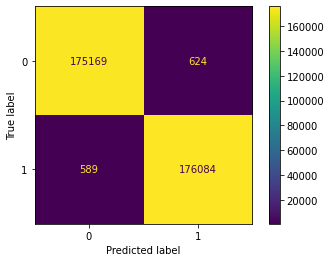

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
model.feature_importances_

array([0.02015824, 0.29383609, 0.00114243, 0.01392942, 0.02462361,
       0.0268026 , 0.02041071, 0.01606682, 0.00850126, 0.00127175,
       0.0305151 , 0.0469301 , 0.00713338, 0.00866713, 0.03203148,
       0.01217401, 0.00518681, 0.0004373 , 0.00808636, 0.0036455 ,
       0.40259665, 0.0037738 , 0.01207945])

# ***XGBoost Classifier***

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics


In [ ]:
import xgboost as xgb

my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)
 
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Classification Report for Xgboost Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Xgboost Classifier: \n", confusion_matrix(y_test,y_pred))

Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    175793
           1       0.98      0.99      0.99    176673

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of Random Forest Classifier: 
 [[173027   2766]
 [  1010 175663]]
